In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
import os

In [773]:
df_iu_age = pd.read_excel('Project_data.xlsx',sheet_name=1)

df_iu_disability = pd.read_excel('Project_data.xlsx',sheet_name=3)
df_iu_ethnic = pd.read_excel('Project_data.xlsx',sheet_name=4)
df_iu_economic = pd.read_excel('Project_data.xlsx',sheet_name=5)


In [774]:
df_iu_age = df_iu_age.dropna().set_index('Unnamed: 0')
df_iu_age = df_iu_age.transpose()
df_iu_age


Unnamed: 0,All adults,16-24,25-34,35-44,45-54,55-64,65-74,75+,Men,Women
2014,39684.0,7145.0,7903.0,8074.0,7430.0,5434.0,2799.0,898.0,20039.0,19645.0
2015,40764.0,7088.0,8162.0,7986.0,7694.0,5624.0,3153.0,1057.0,20564.0,20200.0
2016,42243.0,7075.0,8457.0,7952.0,8005.0,5821.0,3562.0,1371.0,21242.0,21001.0
2017,43457.0,7074.0,8660.0,7900.0,8290.0,6060.0,3939.0,1534.0,21814.0,21643.0
2018,44671.0,7155.0,8582.0,8053.0,8498.0,6361.0,4390.0,1632.0,22229.0,22442.0
2019,45917.0,7129.0,8720.0,8129.0,8686.0,6607.0,4721.0,1925.0,22812.0,23105.0
2020,46742.0,7036.0,8815.0,8118.0,8803.0,6888.0,5031.0,2050.0,23200.0,23542.0
2021,47560.0,6992.0,8894.0,8145.0,8814.0,7189.0,5264.0,2262.0,23606.0,23954.0


In [775]:

# y = f_iu_age.iloc[:,1]
# y

total = df_iu_age.loc[:,'All adults']
y = [0]*(len(df_iu_age)-1)

# total
# for i in f_iu_age.columns
f_iu_age.columns[7]


'65-74'

In [776]:

for i in range(1,len(df_iu_age)):
    y[i-1] = df_iu_age.iloc[:,i]/total

In [777]:
df_iu_age = df_iu_age.reset_index()


In [778]:
 x = df_iu_age.iloc[:,0]
x

0    2014
1    2015
2    2016
3    2017
4    2018
5    2019
6    2020
7    2021
Name: index, dtype: int64

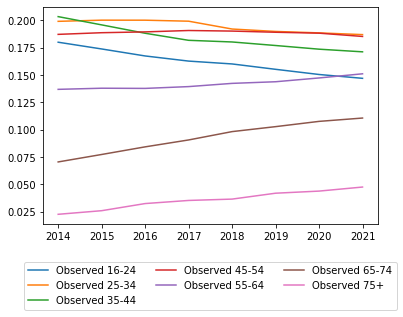

In [1097]:
for i in range(len(x)-1):
    plt.plot(x,y[i], label = 'Observed '+str(df_iu_age.columns[i+2]))
    plt.legend(loc='upper center', fancybox = True, bbox_to_anchor = (0.5, -0.15), ncol = 3)
    
    
    # plt.legend([l1,l2,l3], ['label1', 'label2', 'label3'])
    
    

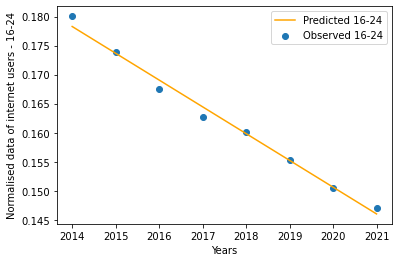

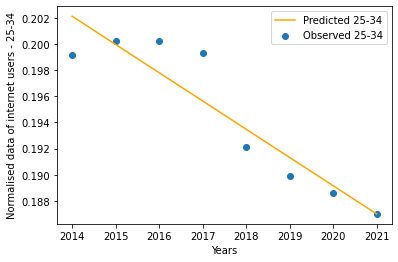

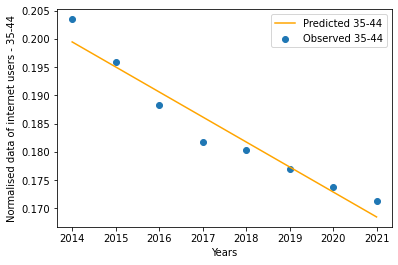

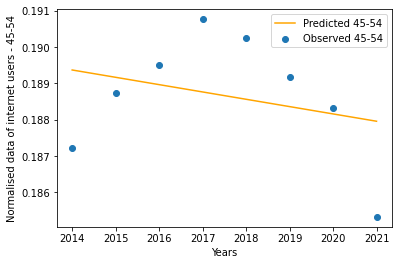

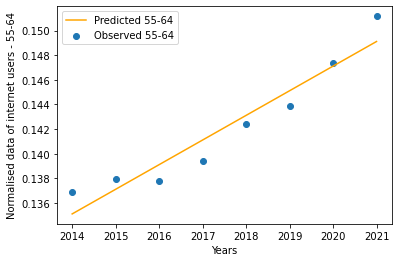

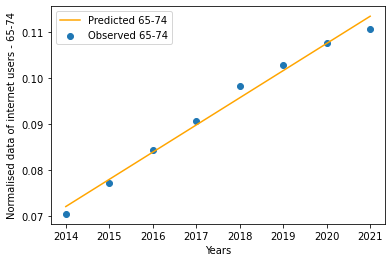

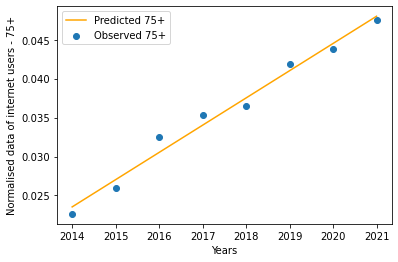

In [780]:
x = np.array(x).reshape((-1,1))
# for i in range(len(x)-1):
#     print(y[i])
# len(x)


for i in range(len(x)-1):
    model = LinearRegression().fit(x,y[i])
    model.intercept_
    model.coef_
    y_pred=model.predict(x)
    plt.plot(x,y_pred, color = 'orange', label = 'Predicted '+str(df_iu_age.columns[i+2]))
    plt.scatter(x,y[i], label = 'Observed '+str(df_iu_age.columns[i+2]))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_age.columns[i+2]))
    plt.legend()
    plt.show()

In [781]:
model.intercept_

-7.02079979919851

In [782]:
model.coef_


array([0.00349768])

In [783]:

print(model.predict(x))


[0.02353172 0.0270294  0.03052708 0.03402476 0.03752245 0.04102013
 0.04451781 0.04801549]


In [784]:
# # for i in range(len(x)):
# #     y_pred = model.predict(x)
# y_pred = model.predict(x)
# y_pred

# # for i in range(len(x)-1):
# plt.plot(x,y_pred)
# plt.scatter(x,y)
# plt.show()

f_oneway(y[0],y[1],y[2],y[3],y[4],y[5],y[6])


F_onewayResult(statistic=322.68697018437604, pvalue=1.3241207116330828e-37)

<h2>Usage by Sex
</h2>

In [795]:
df_iu_sex = pd.read_excel('Project_data.xlsx',sheet_name=2)
df_iu_sex = df_iu_sex .transpose()

df_iu_sex
# = df_iu_sex.transpose()
# df_iu_sex

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Unnamed: 0,All,All,16-24,16-24,25-34,25-34,35-44,35-44,45-54,45-54,55-64,55-64,65-74,65-74,75+,75+
Unnamed: 1,Men,Women,Men,Women,Men,Women,Men,Women,Men,Women,Men,Women,Men,Women,Men,Women
2014,20039,19645,3643,3503,3989,3914,4010,4064,3661,3770,2710,2724,1472,1327,554,344
2015,20564,20200,3610,3477,4136,4026,3969,4016,3803,3891,2807,2817,1652,1501,587,471
2016,21242,21001,3593,3482,4272,4186,3939,4013,3945,4059,2877,2944,1847,1715,769,603
2017,21814,21643,3590,3484,4408,4252,3925,3976,4058,4232,3004,3056,1984,1955,846,688
2018,22229,22442,3638,3517,4276,4307,3975,4078,4182,4315,3118,3244,2183,2207,858,774
2019,22812,23105,3622,3507,4340,4380,4018,4111,4270,4416,3240,3367,2323,2398,998,926
2020,23200,23542,3594,3443,4402,4413,4011,4107,4314,4489,3375,3513,2471,2560,1033,1017
2021,23606,23954,3561,3431,4454,4440,4025,4120,4310,4504,3516,3673,2580,2684,1159,1103


In [834]:
len(df_iu_sex)


10

In [863]:


y_sex_men = [0]*(len(df_iu_sex)-3)

y_sex_women = [0]*(len(df_iu_sex)-3)
len(y_sex_men)


7

In [867]:
ct = 0
#Men

for i in range(2,len(df_iu_sex.columns),2):
        y_sex_men[ct] = df_iu_sex.iloc[2:,i]
        ct = ct+1

        
ct = 0   
#Women
for i in range(3,len(df_iu_sex.columns),2):
        y_sex_women[ct] = df_iu_sex.iloc[2:,i]
        ct = ct+1



In [870]:
y_sex_men
y_sex_women[6]

2014     344
2015     471
2016     603
2017     688
2018     774
2019     926
2020    1017
2021    1103
Name: 15, dtype: object

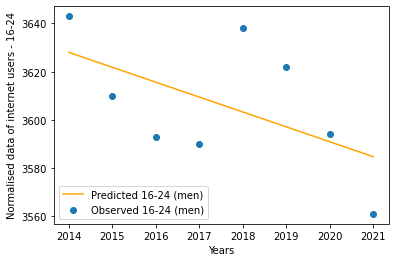

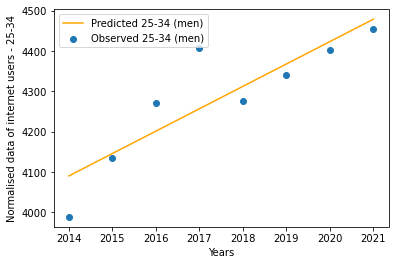

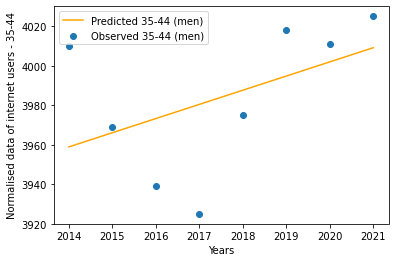

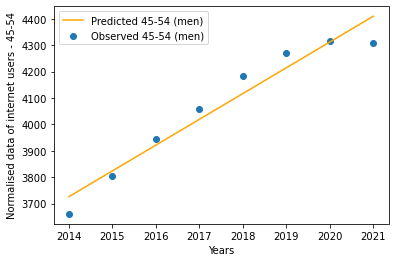

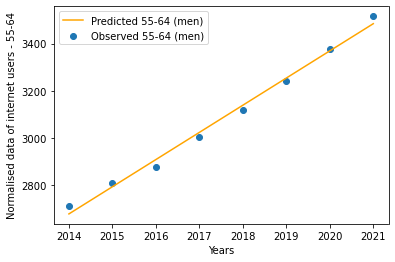

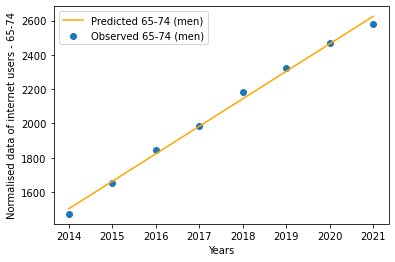

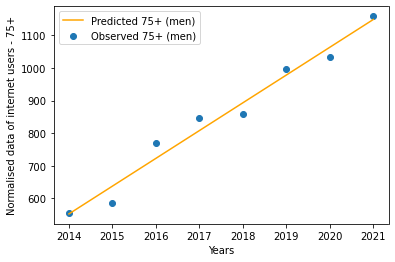

In [1098]:
for i in range(len(x)-1):
    model = LinearRegression().fit(x,y_sex_men[i])
    model.intercept_
    model.coef_
    y_sex_men_pred = model.predict(x)
    plt.plot(x, y_sex_men_pred, color = 'orange', label = 'Predicted '+str(df_iu_age.columns[i+2]+' (men)'))
    plt.scatter(x,y_sex_men[i], label = 'Observed '+str(df_iu_age.columns[i+2]+' (men)'))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_age.columns[i+2]))
    plt.legend()
    plt.show()

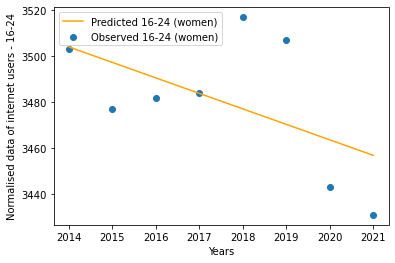

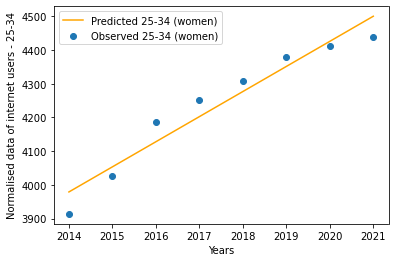

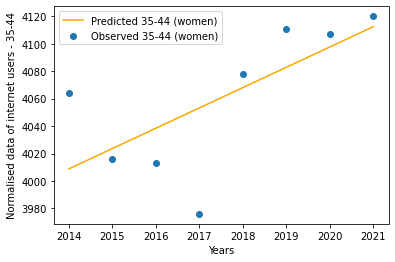

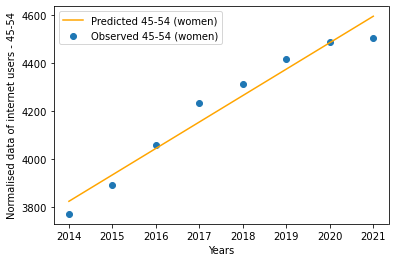

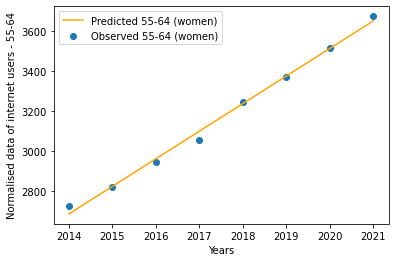

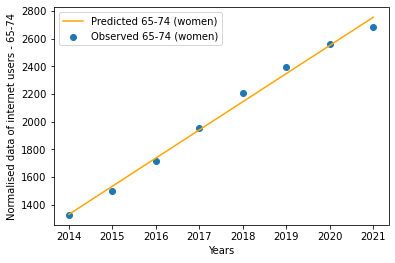

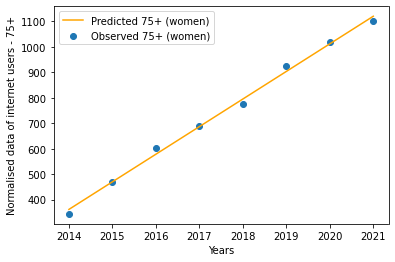

In [1100]:
for i in range(len(x)-1):
    model = LinearRegression().fit(x,y_sex_women[i])
    model.intercept_
    model.coef_
    y_sex_women_pred = model.predict(x)
    plt.plot(x, y_sex_women_pred, color = 'orange', label = 'Predicted '+str(df_iu_age.columns[i+2]+' (women)'))
    plt.scatter(x,y_sex_women[i], label = 'Observed '+str(df_iu_age.columns[i+2]+' (women)'))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_age.columns[i+2]))
    plt.legend()
    plt.show()

<h1>Disability</h1>


In [970]:
df_iu_disability = pd.read_excel('Project_data.xlsx',sheet_name=3)
df_iu_disability

,Unnamed: 0,Unnamed: 1,2017,2018,2019,2020,2021
0,All,Equality Act Disabled1,7413,8038,8586,8984,9543
1,All,Not Equality Act Disabled2,36044,36633,37330,37758,38017
2,16-24,Equality Act Disabled,697,752,824,834,824
3,16-24,Not Equality Act Disabled,6377,6403,6306,6202,6168
4,25-34,Equality Act Disabled,864,923,1026,1031,1144
5,25-34,Not Equality Act Disabled,7796,7660,7694,7785,7750
6,35-44,Equality Act Disabled,1091,1127,1185,1194,1207
7,35-44,Not Equality Act Disabled,6809,6926,6945,6924,6937
8,45-54,Equality Act Disabled,1421,1562,1591,1634,1732
9,45-54,Not Equality Act Disabled,6869,6936,7095,7169,7082


In [971]:
df_iu_disability = df_iu_disability.transpose()
df_iu_disability

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Unnamed: 0,All,All,16-24,16-24,25-34,25-34,35-44,35-44,45-54,45-54,55-64,55-64,65-74,65-74,75+,75+
Unnamed: 1,Equality Act Disabled1,Not Equality Act Disabled2,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled,Equality Act Disabled,Not Equality Act Disabled
2017,7413,36044,697,6377,864,7796,1091,6809,1421,6869,1472,4588,1198,2741,672,862
2018,8038,36633,752,6403,923,7660,1127,6926,1562,6936,1594,4767,1330,3060,751,881
2019,8586,37330,824,6306,1026,7694,1185,6945,1591,7095,1651,4956,1477,3245,834,1091
2020,8984,37758,834,6202,1031,7785,1194,6924,1634,7169,1725,5163,1643,3388,923,1128
2021,9543,38017,824,6168,1144,7750,1207,6937,1732,7082,1845,5344,1721,3543,1070,1192


In [947]:
#new x array for disabled data sheet
x_dis = np.array(df_iu_disability.reset_index().iloc[2:,0]).reshape((-1,1)).astype('int64')
x_dis

array([[2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [948]:
len(df_iu_disability.columns)

16

In [949]:
df_iu_disability.iloc[2:,15]



2017     862
2018     881
2019    1091
2020    1128
2021    1192
Name: 15, dtype: object

In [972]:
y_disabled = [0]*(len(df_iu_disability))
y_not_disabled = [0]*(len(df_iu_disability))


len(y_disabled)





7

In [973]:
ct = 0
#disabled

for i in range(2,len(df_iu_disability.columns)-1,2):
        y_disabled[ct] = df_iu_disability.iloc[2:,i]
        ct = ct+1

        
ct = 0   
#not_disabled
for i in range(3,len(df_iu_disability.columns),2):
        y_not_disabled[ct] = df_iu_disability.iloc[2:,i]
        ct = ct+1


y_not_disabled

[2017    6377
 2018    6403
 2019    6306
 2020    6202
 2021    6168
 Name: 3, dtype: object,
 2017    7796
 2018    7660
 2019    7694
 2020    7785
 2021    7750
 Name: 5, dtype: object,
 2017    6809
 2018    6926
 2019    6945
 2020    6924
 2021    6937
 Name: 7, dtype: object,
 2017    6869
 2018    6936
 2019    7095
 2020    7169
 2021    7082
 Name: 9, dtype: object,
 2017    4588
 2018    4767
 2019    4956
 2020    5163
 2021    5344
 Name: 11, dtype: object,
 2017    2741
 2018    3060
 2019    3245
 2020    3388
 2021    3543
 Name: 13, dtype: object,
 2017     862
 2018     881
 2019    1091
 2020    1128
 2021    1192
 Name: 15, dtype: object]

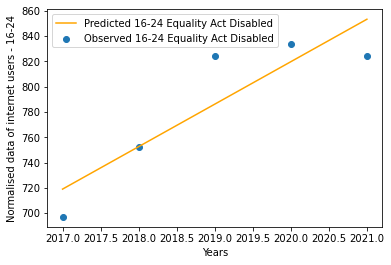

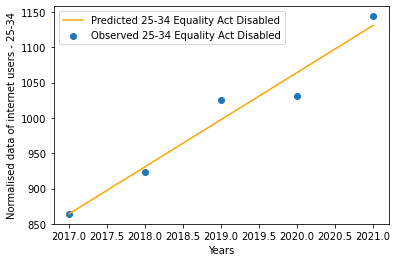

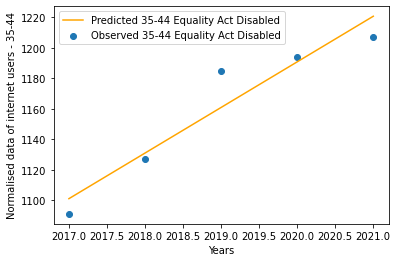

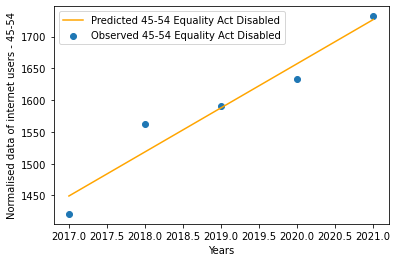

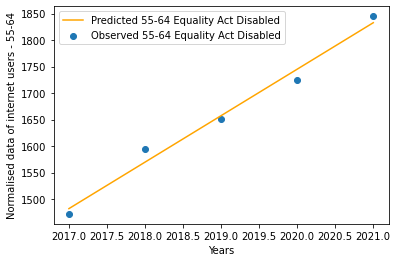

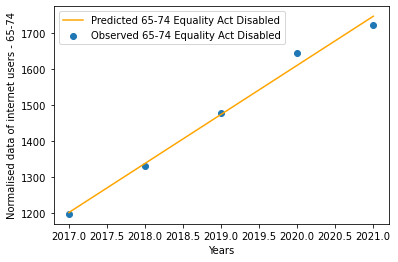

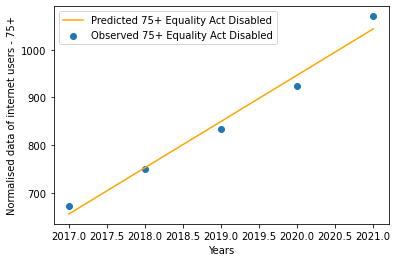

In [1101]:
#disabled regression

for i in range(len(x_dis)+2):
    model = LinearRegression().fit(x_dis,y_disabled[i])
    model.intercept_
    model.coef_
    y_disabled_pred = model.predict(x_dis)
    plt.plot(x_dis, y_disabled_pred, color = 'orange', label = 'Predicted '+str(df_iu_age.columns[i+2]+' Equality Act Disabled'))
    plt.scatter(x_dis,y_disabled[i], label = 'Observed '+str(df_iu_age.columns[i+2]+' Equality Act Disabled'))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_age.columns[i+2]))
    plt.legend()
    plt.show()

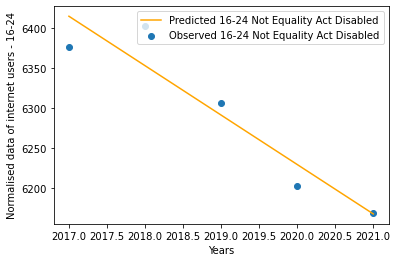

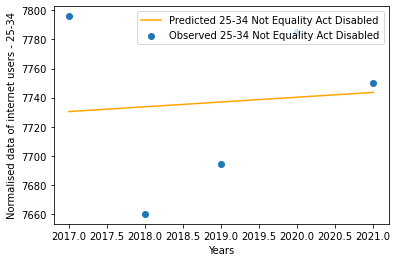

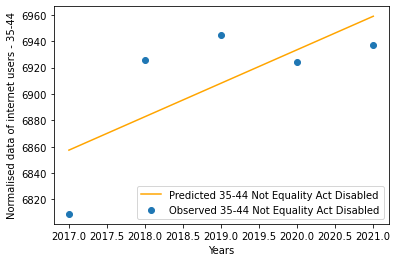

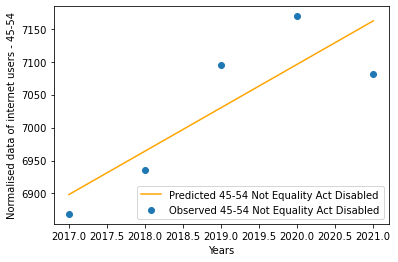

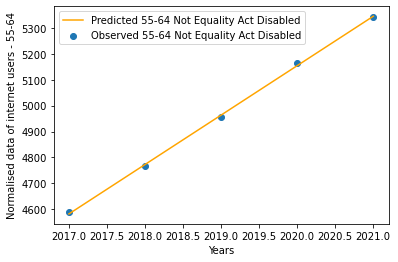

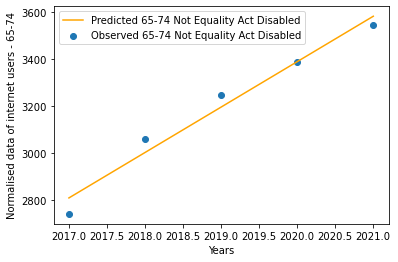

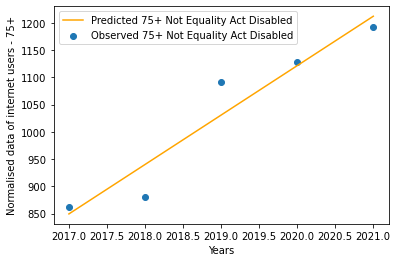

In [1102]:
#not disabled regression

for i in range(len(x_dis)+2):
    model = LinearRegression().fit(x_dis,y_not_disabled[i])
    model.intercept_
    model.coef_
    y_not_disabled_pred = model.predict(x_dis)
    plt.plot(x_dis, y_not_disabled_pred, color = 'orange', label = 'Predicted '+str(df_iu_age.columns[i+2]+' Not Equality Act Disabled'))
    plt.scatter(x_dis,y_not_disabled[i], label = 'Observed '+str(df_iu_age.columns[i+2]+' Not Equality Act Disabled'))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_age.columns[i+2]))
    plt.legend()
    plt.show()

<h1>Ethnicity</h1>

In [980]:
df_iu_ethnic = pd.read_excel('Project_data.xlsx',sheet_name=4)
df_iu_ethnic

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021
0,White,35546,36430,37585,38601,39498,40526,40885,41825
1,Mixed/multiple ethnic background,343,401,406,471,471,490,591,510
2,Indian,875,906,954,1025,1086,1090,1094,1087
3,Pakistani,475,527,593,653,684,715,759,779
4,Bangladeshi,171,195,213,239,252,247,316,320
5,Chinese,249,220,250,226,251,267,275,303
6,Other Asian background,423,466,465,467,464,569,562,576
7,Black/African/Caribbean/Black British,940,981,1098,1063,1186,1253,1394,1352
8,Other ethnic group,616,617,655,684,746,711,838,784


In [1029]:
df_iu_ethnic = df_iu_ethnic.transpose()
df_iu_ethnic

,0,1,2,3,4,5,6,7,8
Unnamed: 0,White,Mixed/multiple ethnic background,Indian,Pakistani,Bangladeshi,Chinese,Other Asian background,Black/African/Caribbean/Black British,Other ethnic group
2014,35546,343,875,475,171,249,423,940,616
2015,36430,401,906,527,195,220,466,981,617
2016,37585,406,954,593,213,250,465,1098,655
2017,38601,471,1025,653,239,226,467,1063,684
2018,39498,471,1086,684,252,251,464,1186,746
2019,40526,490,1090,715,247,267,569,1253,711
2020,40885,591,1094,759,316,275,562,1394,838
2021,41825,510,1087,779,320,303,576,1352,784


In [1046]:
df_iu_ethnic.iloc[1:,0]

2014    35546
2015    36430
2016    37585
2017    38601
2018    39498
2019    40526
2020    40885
2021    41825
Name: 0, dtype: object

In [1063]:
df_iu_ethnic.iloc[0,1]

'Mixed/multiple ethnic background'

In [1054]:
y_ethnic = [0]*(len(df_iu_ethnic))
len(y_ethnic)

9

In [1055]:
#ethnic


for i in range(0,len(df_iu_ethnic.columns)):
        y_ethnic[i] = df_iu_ethnic.iloc[1:,i]
      



In [1056]:
y_ethnic

[2014    35546
 2015    36430
 2016    37585
 2017    38601
 2018    39498
 2019    40526
 2020    40885
 2021    41825
 Name: 0, dtype: object,
 2014    343
 2015    401
 2016    406
 2017    471
 2018    471
 2019    490
 2020    591
 2021    510
 Name: 1, dtype: object,
 2014     875
 2015     906
 2016     954
 2017    1025
 2018    1086
 2019    1090
 2020    1094
 2021    1087
 Name: 2, dtype: object,
 2014    475
 2015    527
 2016    593
 2017    653
 2018    684
 2019    715
 2020    759
 2021    779
 Name: 3, dtype: object,
 2014    171
 2015    195
 2016    213
 2017    239
 2018    252
 2019    247
 2020    316
 2021    320
 Name: 4, dtype: object,
 2014    249
 2015    220
 2016    250
 2017    226
 2018    251
 2019    267
 2020    275
 2021    303
 Name: 5, dtype: object,
 2014    423
 2015    466
 2016    465
 2017    467
 2018    464
 2019    569
 2020    562
 2021    576
 Name: 6, dtype: object,
 2014     940
 2015     981
 2016    1098
 2017    1063
 2018    1186
 20

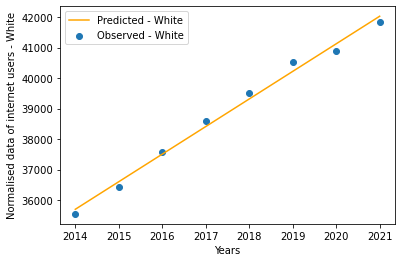

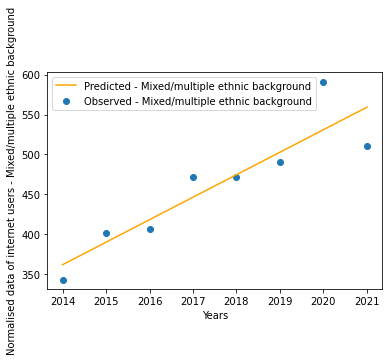

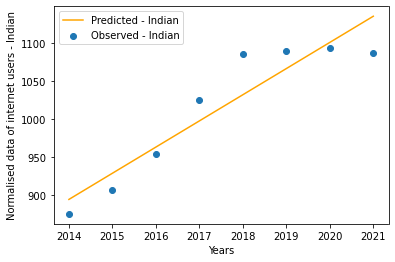

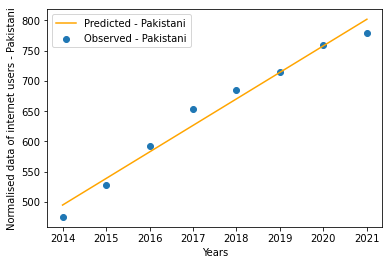

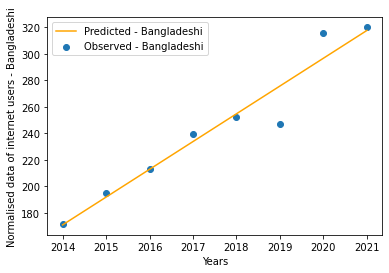

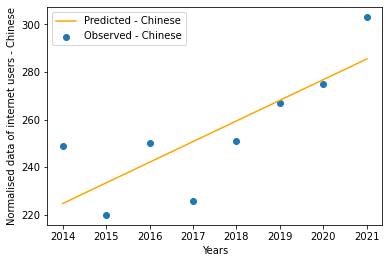

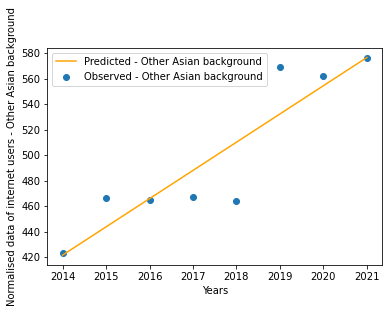

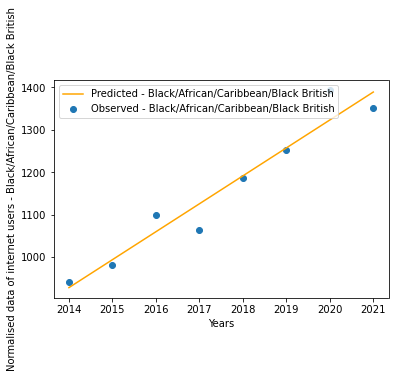

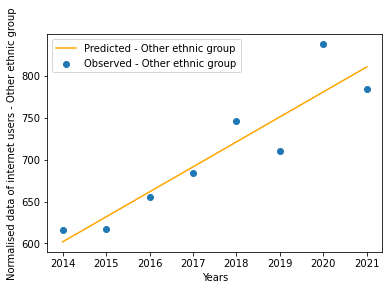

In [1103]:

for i in range(len(x)+1):
    model = LinearRegression().fit(x,y_ethnic[i])
    model.intercept_
    model.coef_
    y_ethnic_pred = model.predict(x)
    plt.plot(x,y_ethnic_pred, color = 'orange', label = 'Predicted - '+str(df_iu_ethnic.iloc[0,i]))
    plt.scatter(x,y_ethnic[i], label = 'Observed - '+str(df_iu_ethnic.iloc[0,i]))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_ethnic.iloc[0,i]))
    plt.legend()
    plt.show()

<h1>Economic Activity</h1>

In [1065]:
df_iu_economic = pd.read_excel('Project_data.xlsx',sheet_name=5)
df_iu_economic

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021
0,Employee,23147,23390,24056,24599,25463,25971,26346,26848
1,Self-employed,3493,3788,3865,4266,4288,4510,4621,4543
2,Government employment & training programmes,118,87,144,116,94,86,92,57
3,Unpaid family worker,84,82,84,107,107,90,105,106
4,Unemployed,2217,2363,2318,2061,1719,1610,1479,1340
5,Student,2470,2426,2422,2428,2460,2391,2443,2459
6,Retired,4084,4493,5047,5497,5885,6404,6812,7318
7,Inactive,4070,4134,4307,4383,4658,4855,4844,4889
8,Total,39684,40764,42243,43457,44671,45917,46742,47560


In [1069]:
df_iu_economic = df_iu_economic.transpose()
df_iu_economic

,0,1,2,3,4,5,6,7,8
Unnamed: 0,Employee,Self-employed,Government employment & training programmes,Unpaid family worker,Unemployed,Student,Retired,Inactive,Total
2014,23147,3493,118,84,2217,2470,4084,4070,39684
2015,23390,3788,87,82,2363,2426,4493,4134,40764
2016,24056,3865,144,84,2318,2422,5047,4307,42243
2017,24599,4266,116,107,2061,2428,5497,4383,43457
2018,25463,4288,94,107,1719,2460,5885,4658,44671
2019,25971,4510,86,90,1610,2391,6404,4855,45917
2020,26346,4621,92,105,1479,2443,6812,4844,46742
2021,26848,4543,57,106,1340,2459,7318,4889,47560


In [1073]:
df_iu_economic.iloc[1:,0]

2014    23147
2015    23390
2016    24056
2017    24599
2018    25463
2019    25971
2020    26346
2021    26848
Name: 0, dtype: object

In [1082]:
len(df_iu_economic)
df_iu_economic.iloc[0,0]
y_economic = [0]*(len(df_iu_economic)-1)
y_economic

[0, 0, 0, 0, 0, 0, 0, 0]

In [1087]:
for i in range(0,len(df_iu_economic.columns)-1):
        y_economic[i] = df_iu_economic.iloc[1:,i]

print(y_economic)

[2014    23147
2015    23390
2016    24056
2017    24599
2018    25463
2019    25971
2020    26346
2021    26848
Name: 0, dtype: object, 2014    3493
2015    3788
2016    3865
2017    4266
2018    4288
2019    4510
2020    4621
2021    4543
Name: 1, dtype: object, 2014    118
2015     87
2016    144
2017    116
2018     94
2019     86
2020     92
2021     57
Name: 2, dtype: object, 2014     84
2015     82
2016     84
2017    107
2018    107
2019     90
2020    105
2021    106
Name: 3, dtype: object, 2014    2217
2015    2363
2016    2318
2017    2061
2018    1719
2019    1610
2020    1479
2021    1340
Name: 4, dtype: object, 2014    2470
2015    2426
2016    2422
2017    2428
2018    2460
2019    2391
2020    2443
2021    2459
Name: 5, dtype: object, 2014    4084
2015    4493
2016    5047
2017    5497
2018    5885
2019    6404
2020    6812
2021    7318
Name: 6, dtype: object, 2014    4070
2015    4134
2016    4307
2017    4383
2018    4658
2019    4855
2020    4844
2021    4889
Name: 7

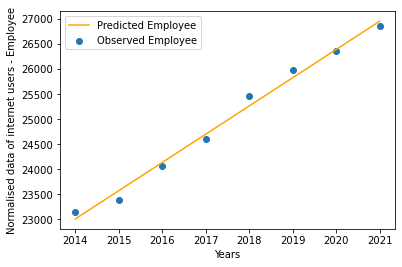

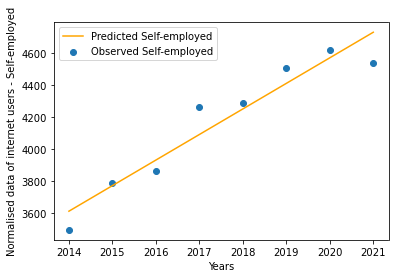

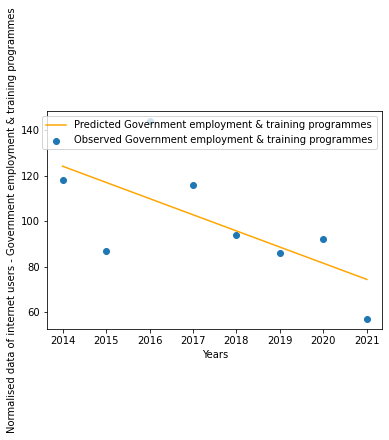

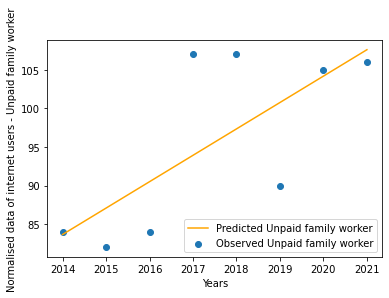

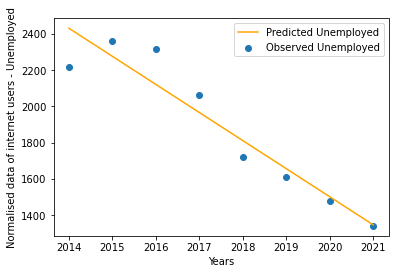

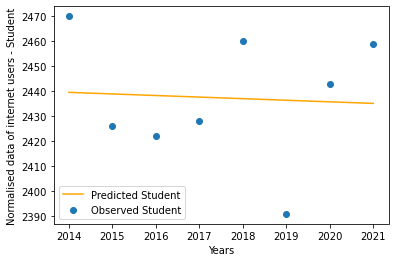

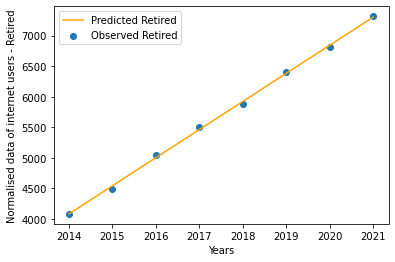

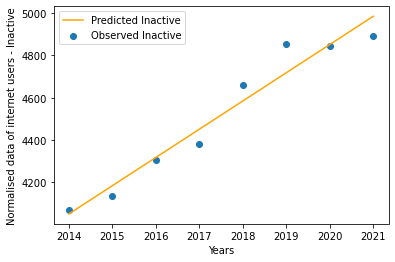

In [1089]:
for i in range(len(x)):
    model = LinearRegression().fit(x,y_economic[i])
    model.intercept_
    model.coef_
    y_economic_pred = model.predict(x)
    plt.plot(x,y_economic_pred, color = 'orange', label = 'Predicted '+str(df_iu_economic.iloc[0,i]))
    plt.scatter(x,y_economic[i], label = 'Observed '+str(df_iu_economic.iloc[0,i]))
    plt.xlabel("Years")
    plt.ylabel("Normalised data of internet users - "+str(df_iu_economic.iloc[0,i]))
    plt.legend()
    plt.show()